# 1. Some intialization

In [25]:
import numpy as np
from termcolor import colored

import gym
env = gym.make('CliffWalking-v0')
no_states = env.observation_space.n
no_actions = env.action_space.n
print("No of state = ", no_states)
print("No of actions =", no_actions)

No of state =  48
No of actions = 4


In [26]:
q_table = np.zeros((no_states,no_actions))
v = np.zeros(no_states)

alpha = 0.2
gamma = 0.99

episodes = 200
eps_steps = episodes*2//3
max_eps =1
min_eps = 0.01
eps_a = (max_eps - min_eps)/ eps_steps
decay_rate = 0.1


# 2. Function to implement episilon greedy action selection

In [27]:
def eps_greedy(current_state,step_no,trainingOn):
    eps = 0.8
    if np.random.uniform() < eps and trainingOn:
        action = np.random.randint(0, no_actions)
    else:
        q_values = q_table[current_state]
        action = np.argmax(q_values)
    return action



In [28]:
def boltzmann(current_state, step_no,trainingOn):
    if trainingOn:
        newTau = 100 * np.exp(-decay_rate * step_no) 
        tau = max(0.1, newTau)
        
        print("Tau = ", tau)
        q_values = q_table[current_state]
        q_values = np.exp(q_values/tau)
        q_values = q_values/np.sum(q_values)
        action = np.random.choice(no_actions, p=q_values)
    else:
        q_values = q_table[current_state]
        action = np.argmax(q_values)
    return action

# 3. Q Learning algorithm

We carry out a number of episodes, where in each episode we select the next action using epsilon greedy and then repeatedly apply the following update rules:

$Q(s,a) = (1- \alpha)Q(s,a) + \alpha(R(s,a,s') + \gamma V(s'))$ 

$V(s) = \max_{a}{Q(s,a)}$

In [29]:
def update_qtable(state, action, reward,new_state):
    q_table[state, action] = (1-alpha)*q_table[state, action] + alpha*(reward + gamma*v[new_state])
    
    v[state] = max(q_table[state])

In [30]:
def q_learning(episodes, trainingOn):
    
    cumulative_reward = 0
    cumulative_steps = 0
    avg_rewards_list = []

    for e in range(1,episodes+1):
        # start a new episode
        state = env.reset() 

        episode_reward = 0
        episode_step_no = 0
        done = False
        
        while not done:
            action = boltzmann(state, cumulative_steps, trainingOn)
            new_state, reward, done, info = env.step(action)
            
            episode_step_no +=1
            cumulative_steps +=1
            episode_reward += reward

            if trainingOn: 
                update_qtable(state, action, reward,new_state)
                
            state = new_state

        # print(colored(f'Episode:{e}, Steps = {episode_step_no},   \tReward = {episode_reward}', 'blue'))
        cumulative_reward += episode_reward
        
        avg_rewards_list.append(cumulative_reward/e)

    average_reward = cumulative_reward/episodes 
    print('Average episode reward =',average_reward )
    return avg_rewards_list

In [31]:
def print_Qtable():
    m,n = q_table.shape

    print("State\t Left \t Down \t Right \t Up")
    print()
    for i in range(m):
        print(f'S{i}', end='')
        for j in range(n):
            print(f'\t {q_table[i,j]:.2f}', end='')
        print('')
    

# 4. Apply the Q-Learning Algorithm

In [32]:
avg_list = q_learning(episodes, True)

Tau =  100.0
Tau =  90.48374180359595
Tau =  81.87307530779819
Tau =  74.08182206817179
Tau =  67.03200460356393
Tau =  60.653065971263345
Tau =  54.88116360940264
Tau =  49.65853037914095
Tau =  44.932896411722155
Tau =  40.65696597405991
Tau =  36.787944117144235
Tau =  33.28710836980795
Tau =  30.1194211912202
Tau =  27.25317930340126
Tau =  24.659696394160644
Tau =  22.313016014842983
Tau =  20.189651799465537
Tau =  18.26835240527346
Tau =  16.529888822158654
Tau =  14.956861922263503
Tau =  13.53352832366127
Tau =  12.24564282529819
Tau =  11.080315836233387
Tau =  10.025884372280371
Tau =  9.071795328941247
Tau =  8.20849986238988
Tau =  7.427357821433388
Tau =  6.7205512739749755
Tau =  6.081006262521795
Tau =  5.502322005640721
Tau =  4.978706836786395
Tau =  4.50492023935578
Tau =  4.076220397836621
Tau =  3.6883167401239993
Tau =  3.3373269960326066
Tau =  3.0197383422318502
Tau =  2.7323722447292558
Tau =  2.4723526470339388
Tau =  2.237077185616559
Tau =  2.024191144580438

In [33]:
print_Qtable()

State	 Left 	 Down 	 Right 	 Up

S0	 -10.71	 -10.68	 -10.79	 -10.77
S1	 -10.41	 -10.18	 -10.35	 -10.20
S2	 -9.70	 -9.54	 -9.94	 -9.78
S3	 -9.17	 -8.87	 -9.10	 -9.21
S4	 -8.34	 -8.16	 -8.45	 -8.30
S5	 -7.57	 -7.44	 -7.65	 -7.53
S6	 -6.75	 -6.69	 -6.86	 -6.88
S7	 -6.19	 -5.93	 -6.09	 -6.25
S8	 -5.28	 -5.19	 -5.21	 -5.53
S9	 -4.63	 -4.42	 -4.57	 -4.57
S10	 -3.72	 -3.59	 -3.73	 -3.71
S11	 -2.88	 -2.99	 -2.89	 -3.02
S12	 -11.10	 -11.05	 -11.29	 -11.13
S13	 -10.39	 -10.39	 -10.65	 -10.70
S14	 -9.82	 -9.64	 -9.88	 -10.10
S15	 -9.12	 -8.90	 -9.12	 -9.03
S16	 -8.47	 -8.14	 -8.31	 -8.38
S17	 -7.56	 -7.34	 -7.48	 -7.83
S18	 -6.71	 -6.51	 -6.57	 -6.89
S19	 -5.86	 -5.65	 -5.74	 -5.84
S20	 -5.16	 -4.75	 -4.81	 -4.99
S21	 -4.29	 -3.86	 -3.88	 -3.96
S22	 -3.46	 -2.96	 -2.94	 -3.46
S23	 -2.51	 -2.28	 -1.99	 -2.51
S24	 -11.75	 -11.36	 -11.92	 -11.78
S25	 -10.83	 -10.47	 -20.12	 -11.02
S26	 -9.86	 -9.56	 -20.08	 -10.20
S27	 -9.14	 -8.65	 -20.23	 -9.44
S28	 -8.30	 -7.73	 -20.18	 -8.32
S29	 -7.39	 -6.79	 -

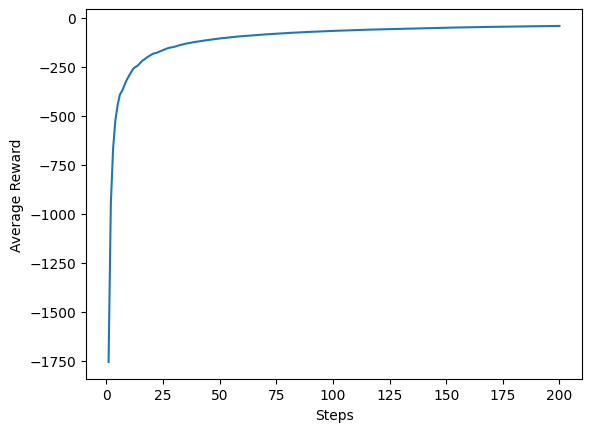

In [34]:
import matplotlib.pyplot as plt

xs = range(1, episodes+1)
plt.plot(xs, avg_list)
plt.xlabel("Steps")
plt.ylabel('Average Reward')
plt.show()

In [35]:
env.reset()
test_episodes = 4000
avg_list2 = q_learning(test_episodes, False)

Average episode reward = -13.0


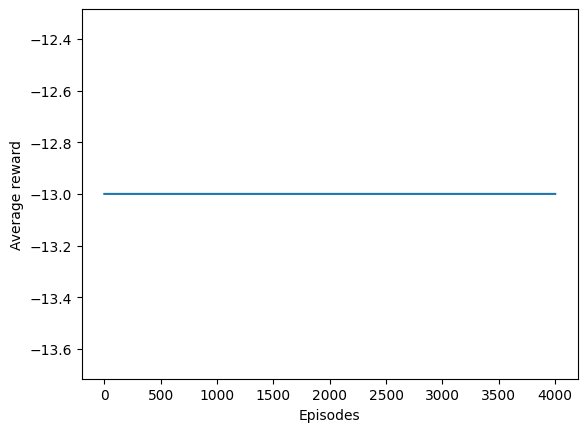

In [36]:
xs2 = range(1, test_episodes+1)
plt.plot(xs2, avg_list2)
plt.xlabel("Episodes")
plt.ylabel("Average reward")
plt.show()